
<img src="https://assets.zindi.africa/media/00aa4a928f3c44f881834d47fe624d91.png"/>


# UNICEF Arm 2030 Vision #1: Flood Prediction in Malawi

On 14 March 2019, tropical Cyclone Idai made landfall at the port of Beira, Mozambique, before moving across the region. Millions of people in Malawi, Mozambique and Zimbabwe have been affected by what is the worst natural disaster to hit southern Africa in at least two decades.

In recent decades, countries across Africa have experienced an increase in the frequency and severity of floods. Malawi has been hit with major floods in 2015 and again in 2019. In fact, between 1946 and 2013, floods accounted for 48% of major disasters in Malawi. The Lower Shire Valley in southern Malawi, bordering Mozambique, composed of Chikwawa and Nsanje Districts is the area most prone to flooding.

The objective of this challenge is to build a machine learning model that helps predict the location and extent of floods in southern Malawi.

This competition is sponsored by Arm and UNICEF as part of the 2030Vision initiative.

About 2030Vision (2030vision.com):


2030Vision is an initiative founded to propel technology forward to support the Sustainable Development Goals (SDGs). 2030Vision aims to transform the use of technology through collaborative partnerships and innovative projects, to support the delivery of the SDGs and unlock the commercial opportunities they offer, by identifying and scaling impactful technologies through multi-sector partnerships.

About UNICEF (unicef.org):


The United Nations Children's Fund (UNICEF) is a United Nations agency responsible for providing humanitarian and developmental aid to children around the world. UNICEF works in some of the world’s toughest places, to reach the world’s most disadvantaged children. Across more than 190 countries and territories, we work for every child, everywhere, to build a better world for everyone.

About Arm (arm.com):


Arm is the world’s leading semiconductor IP company with technologies reaching 70% of the global population. Arm’s device architectures orchestrate the performance of the technology that's transforming our lives — from smartphones to supercomputers, from medical instruments to agricultural sensors, and from base stations to servers. In response to the Global Goals and in recognition of Arm’s position within the technology sector, Arm founded 2030Vision in 2017, in partnership with the UN system and others.

##  The causes of flood 
1. Heavy Rains

The simplest explanation for flooding is heavy rains. No matter where you live, you are surrounded by infrastructure and systems designed to move rainwater into appropriate basins and reservoirs. In most cases, the infrastructure does its job, and you never have to think about where the rain goes when it runs off.

When it rains heavily, however, those systems are overwhelmed, and that water doesn’t drain nearly as quickly as it needs to. In short, the drainage systems back up, and the water rises — sometimes into homes. This typically happens only in cases of sustained heavy rains over a long period.

2. Overflowing Rivers

You do not necessarily need to have heavy rains to experience flooding in your area. For example, if you live along a river and areas upstream from you experience heavy rains, it could lead to a serious overflow where you live. Most larger rivers include a series of dams to help manage large amounts of rainfall, and most river systems are managed by government authorities.

Sometimes, however, those authorities have to make tough decisions about how to operate dams. They often can manage the water and prevent flooding altogether — but not always.

3. Broken Dams

Much of America’s infrastructure was built in the 20th century, so it is getting old. When heavy rains come, and water levels rise, aging dams can fail and unleash torrents of water on unsuspecting households.

This is part of what happened after Hurricane Katrina hit New Orleans in 2005. Levees failed and made the flooding far worse than it would have been otherwise. While we have come to depend on 20th-century architecture, and much of it does its job well, there is always a possibility that a structure will fail.

4. Urban Drainage Basins

Many of our cities are made of mostly concrete and other impermeable material. When you have an urban drainage basin that is made of concrete, there is no ground for water to sink into. So, when those drainage basins fill up, it is going to mean flooding for low-lying areas.

This is mostly the case in large urban areas — think Houston and Los Angeles. When heavy rains strike, the basins used to drain them cannot always handle the load.

5. Storm Surges and Tsunamis

Rain is not always the culprit when it comes to flooding. Storm surges related to hurricanes and other storms can lead to significant flooding, as can tsunamis that are sometimes caused by underwater earthquakes.

Given modern technology, we often know about storm surges and tsunamis before they arrive, but this is not always the case. For example, in 2004, an earthquake off the coast of Indonesia created a tsunami that gave little warning before coming ashore.

6. Channels with Steep Sides

Flooding often occurs when there is fast runoff into lakes, rivers and other reservoirs. This is often the case with rivers and other channels that feature steep sides. It is a similar issue to having a lack of vegetation, which is explained in more detail below.

7. A Lack of Vegetation

Vegetation can help slow runoff and prevent flooding. When there is a lack of vegetation, however, there is little to stop water from running off. This can be a bit of a conundrum after a drought.

While area residents likely welcome the rain, the lack of vegetation after the drought can cause flash flooding. This does not always happen given that basins and reservoirs are close to empty, but it can occur in cases of extreme rains following long periods of drought.

8. Melting Snow and Ice

A winter of heavy snow and other precipitation can lead to a spring of flooding. After all, that snow and ice have to go somewhere when they melt. Most mountainous areas experience relatively consistent snowfall totals from year to year, but an unusually heavy winter of precipitation can spell bad news for low-lying areas around the mountains when spring hits.

The good news is that sustained winter precipitation provides a long lead time to prepare for potential flooding. That is a silver lining at the very least.

These are just a few examples of common causes of floods, but there does not need to be an incredible weather event for you to experience flooding at your home. You can experience devastating flooding simply due to a clogged or broken pipe as well as other plumbing issues. No matter how or why you experience a flood, you need a qualified water restoration professional with quality tools to help you get your home back into working order again.



# Librairies importation 

In [57]:
import pandas as pd 
import numpy as np
train  = pd.read_csv('train_zindi.csv')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
import sys
%matplotlib inline

from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, KFold
from sklearn.feature_selection import SelectPercentile
from hyperopt import hp,fmin,Trials, tpe, STATUS_FAIL, STATUS_OK, space_eval, anneal
from hyperopt.pyll import scope
from hyperopt.pyll import stochastic
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pandas_profiling
import time
random_state = 42
kf = KFold(n_splits=2,random_state=random_state)
n_iter= 50




# Data profil and pandas profiling 

##  Variable Description and Identification <a id="2"></a>
Describe what each of the variable indicates and identify our response and predictor variables. Then seperate the categorical variables from numerical variables and finally identify pandas data types (i.e., object, float64 or int64) for every variable.

In [20]:
train.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 40 columns):
X                                 16466 non-null float64
Y                                 16466 non-null float64
target_2015                       16466 non-null float64
elevation                         16466 non-null float64
precip 2014-11-16 - 2014-11-23    16466 non-null float64
precip 2014-11-23 - 2014-11-30    16466 non-null float64
precip 2014-11-30 - 2014-12-07    16466 non-null float64
precip 2014-12-07 - 2014-12-14    16466 non-null float64
precip 2014-12-14 - 2014-12-21    16466 non-null float64
precip 2014-12-21 - 2014-12-28    16466 non-null float64
precip 2014-12-28 - 2015-01-04    16466 non-null float64
precip 2015-01-04 - 2015-01-11    16466 non-null float64
precip 2015-01-11 - 2015-01-18    16466 non-null float64
precip 2015-01-18 - 2015-01-25    16466 non-null float64
precip 2015-01-25 - 2015-02-01    16466 non-null float64
precip 2015-02-01 - 2015-02-08    16

In [19]:
# variable in the combined data
train.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-0

### So what can we see??
**We can see total 39 variables. And each variable has 16466  observations (excluding target_2015).**
### Here comes the description of all variables:
####   Variables 

Square_ID : Each square has a unique ID. 


target_2015 : The target is the percentage of the given rectangle that was flooded, with a value between 0 and 1. 


(X, Y):  coordinates given represent a sqaure 0.01 degrees on each side, centered on that X-Y location.

Elevation :  Mean elevation over the square, based on  dataset in Google Earth Engine.


LC_Type1_mode : Dominant Land Cover Type (Most areas are predominantly grasslands, savannah or cropland)

precip 2014-11-23 - 2014-11-30 : 2014-11-23 - 2014-11-30 Precipitation

precip 2014-11-30 - 2014-12-07 : 2014-11-30 - 2014-12-07 Precipitation

precip 2014-12-07 - 2014-12-14 : 2014-12-07 - 2014-12-14 Precipitation

precip 2014-12-14 - 2014-12-21 : 2014-12-14 - 2014-12-21 Precipitation

precip 2014-12-21 - 2014-12-28 : 2014-12-21 - 2014-12-28 Precipitation

precip 2014-12-28 - 2015-01-04

precip 2015-01-04 - 2015-01-11

precip 2015-01-11 - 2015-01-18

precip 2015-01-18 - 2015-01-25

precip 2015-01-25 - 2015-02-01

precip 2015-02-01 - 2015-02-08 

precip 2015-02-08 - 2015-02-15

precip 2015-02-15 - 2015-02-22

precip 2015-02-22 - 2015-03-01

precip 2015-03-01 - 2015-03-08

precip 2015-03-08 - 2015-03-15

precip 2019-01-20 - 2019-01-27

precip 2019-01-27 - 2019-02-03

precip 2019-02-03 - 2019-02-10

precip 2019-02-10 - 2019-02-17

precip 2019-02-17 - 2019-02-24 

precip 2019-02-24 - 2019-03-03

precip 2019-03-03 - 2019-03-10

precip 2019-03-10 - 2019-03-17

precip 2019-03-17 - 2019-03-24

precip 2019-03-24 - 2019-03-31

precip 2019-03-31 - 2019-04-07

precip 2019-04-07 - 2019-04-14

precip 2019-04-14 - 2019-04-21 

precip 2019-04-21 - 2019-04-28

precip 2019-04-28 - 2019-05-05

precip 2019-05-05 - 2019-05-12



## 2.1 Categorical and Numerical Variables  <a id="2.1"></a>
**Categorical Variable:**  Square_ID  

**Numerical Variable:** target_2015, (X, Y), Elevation, LC_Type1_mode, precip 2014-11-23 - 2014-11-30  .... 

## 2.2 Variable Data Types <a id="2.1"></a>



In [6]:
train.shape

(16466, 40)

In [7]:
# variable in the combined data
train.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-0

In [8]:
train.dtypes

X                                 float64
Y                                 float64
target_2015                       float64
elevation                         float64
precip 2014-11-16 - 2014-11-23    float64
precip 2014-11-23 - 2014-11-30    float64
precip 2014-11-30 - 2014-12-07    float64
precip 2014-12-07 - 2014-12-14    float64
precip 2014-12-14 - 2014-12-21    float64
precip 2014-12-21 - 2014-12-28    float64
precip 2014-12-28 - 2015-01-04    float64
precip 2015-01-04 - 2015-01-11    float64
precip 2015-01-11 - 2015-01-18    float64
precip 2015-01-18 - 2015-01-25    float64
precip 2015-01-25 - 2015-02-01    float64
precip 2015-02-01 - 2015-02-08    float64
precip 2015-02-08 - 2015-02-15    float64
precip 2015-02-15 - 2015-02-22    float64
precip 2015-02-22 - 2015-03-01    float64
precip 2015-03-01 - 2015-03-08    float64
precip 2015-03-08 - 2015-03-15    float64
precip 2019-01-20 - 2019-01-27    float64
precip 2019-01-27 - 2019-02-03    float64
precip 2019-02-03 - 2019-02-10    

 * 38 float variables: - target_2015, (X, Y), Elevation, LC_Type1_mode, precip 2014-11-23 - 2014-11-30 ............
 * 1 int variables: - LC_Type1_mode 
 * 1  Object(number+strings) variables: - Square_ID  .

In [22]:

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [23]:
missing_data(train)

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,object


In [11]:
profile_train_unicef = pandas_profiling.ProfileReport(train) 
profile_train_unicef.to_file(outputfile="/Users/garbamoussa/Desktop/Python_ML/profile_train_unicef.html")
profile_train_unicef

Number of variables,40
Number of observations,16466
Total Missing (%),0.0%
Total size in memory,5.0 MiB
Average record size in memory,320.0 B
Numeric,28
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,11


#  Feature Engineering Or Data Preprocessing <a id="3"></a>
In this section, we transform raw data into understandable format.  We would engineer features like .




## Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#### variable target_2015

In [58]:
# let's preview the target_2015 again.
train['target_2015'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target_2015, dtype: float64

In [59]:
# Let's manully understand the target_2015 column.
train['target_2015'].value_counts().head()

0.000000    13701
1.000000      385
0.129089        5
0.032284        5
0.983864        5
Name: target_2015, dtype: int64

How to create target based the condition of flooding 

If the target has a value greater than zero, it is safe to assume that it was flooded, and if it has zero, it is safe to assume it wasn't flooded.

In [60]:
train['target'] = np.where(train['target_2015']>0, '1', '0')

In [61]:
train['target'].value_counts().head()

0    13701
1     2765
Name: target, dtype: int64

In [64]:

train['target'] = train.target.astype(int)

In [30]:
# Create a function to count total outliers.
def outliers(variable):
    global filtered # Global keyword is used inside a function only when we want to do assignments or when we want to change a variable.
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

In [27]:
#Total number of outliers in target_2015
outliers(train['target_2015'])

Total Outliers of target_2015 : 2765


Text(0.5,1,'target_2015 distribution with outliers')

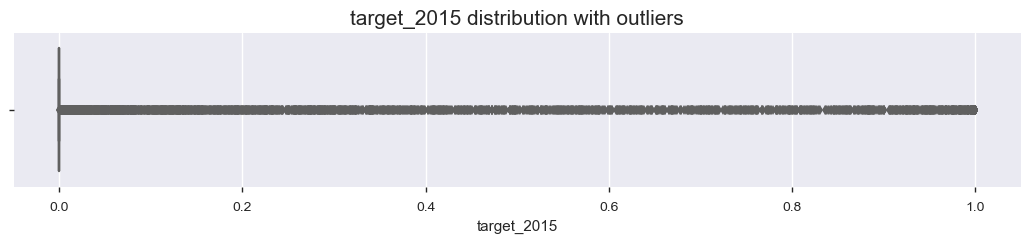

In [28]:
# Visualisation of Fare distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=train['target_2015'],palette='Blues')
plt.title('target_2015 distribution with outliers', fontsize=15 )

The new target variable is target 

target = 1 :   flooded 

target = 0  :   No  flooded 

In [33]:
percent_target = train.groupby('target').count()
percent_target['percent'] = 100*(percent_target['target_2015']/train['target'].count())
percent_target.reset_index(level=0, inplace=True)
percent_target

,target,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,...,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID,percent
0,0,13701,13701,13701,13701,13701,13701,13701,13701,13701,...,13701,13701,13701,13701,13701,13701,13701,13701,13701,83.207822
1,1,2765,2765,2765,2765,2765,2765,2765,2765,2765,...,2765,2765,2765,2765,2765,2765,2765,2765,2765,16.792178


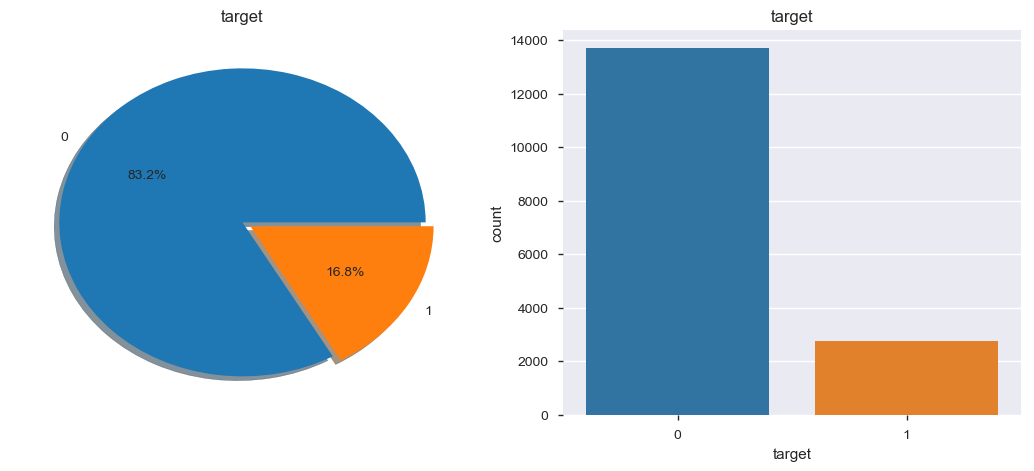

In [35]:
f,ax=plt.subplots(1,2,figsize=(13,5))
train['target'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
ax[1].set_title('target')
plt.show()

Only 16.8% have flooded. That is roughly 2765 out of 16466.

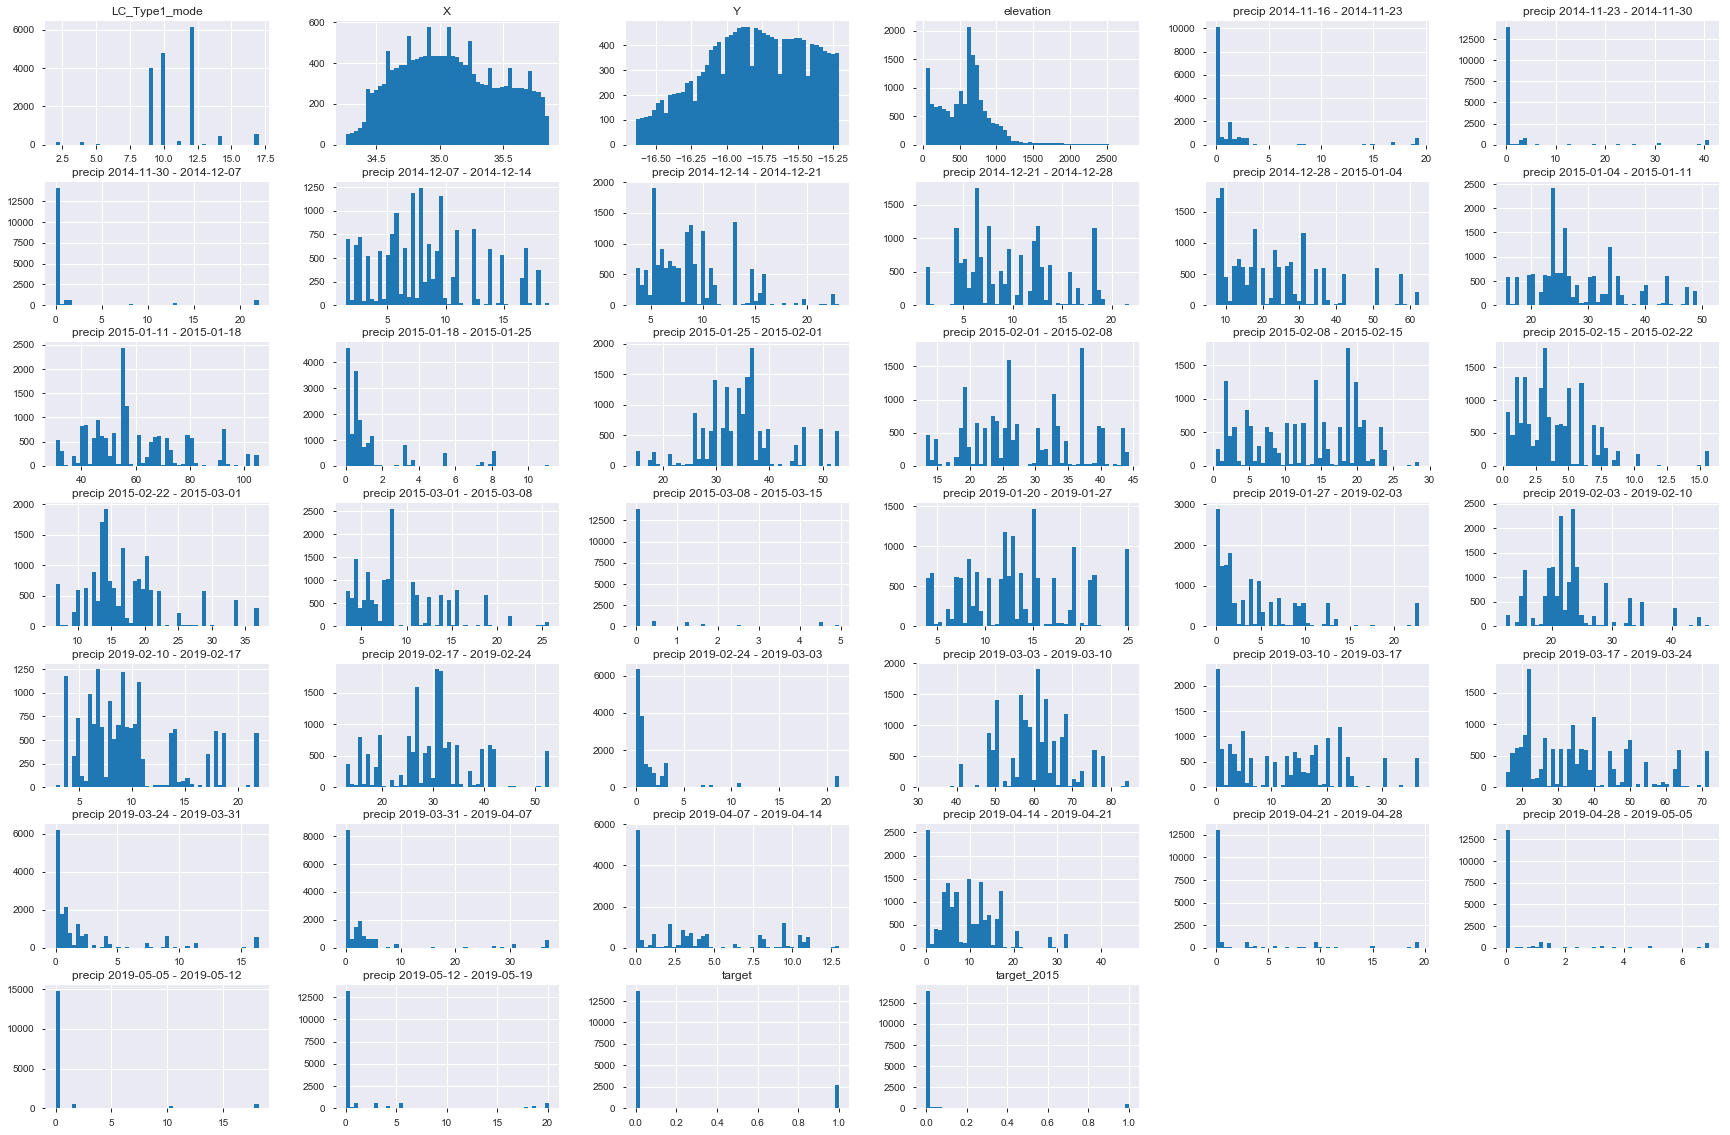

In [65]:
train.hist(bins=50, figsize=(30,20));

In [39]:
train.corr().style.background_gradient(cmap='coolwarm')

#### variable elevation


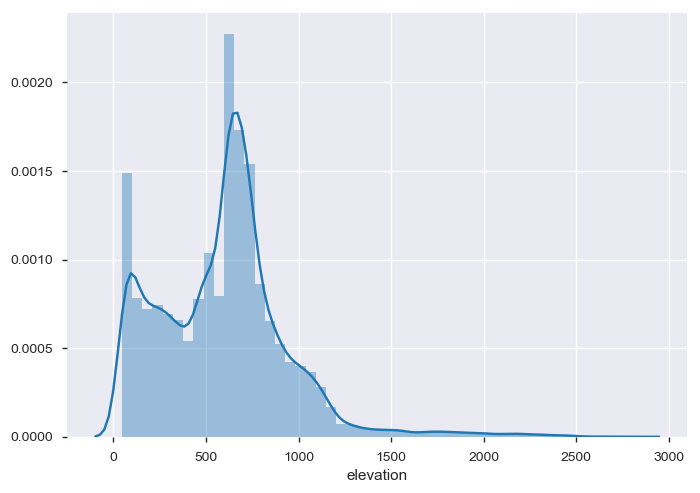

In [49]:
sns.distplot(train['elevation']);

'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:

Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
This is getting interesting! 'elevation', could you give me your body measures?'

In [50]:
#skewness and kurtosis
print("Skewness: %f" % train['elevation'].skew())
print("Kurtosis: %f" % train['elevation'].kurt())

Skewness: 1.084252
Kurtosis: 3.347237


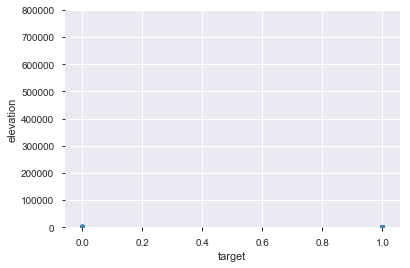

In [66]:
#scatter plot elevation/target`
var = 'target'
data = pd.concat([train['elevation'], train[var]], axis=1)
data.plot.scatter(x=var, y='elevation', ylim=(0,800000));

#### variable X

In [41]:
count_Square_ID = train.Square_ID.value_counts().head(10)
count_Square_ID.head()

4e6bdd6e-14ce-11ea-bce5-f49634744a41    1
4e62a185-14ce-11ea-bce5-f49634744a41    1
4e657fce-14ce-11ea-bce5-f49634744a41    1
4e6f5cf9-14ce-11ea-bce5-f49634744a41    1
4e57c058-14ce-11ea-bce5-f49634744a41    1
Name: Square_ID, dtype: int64

In [44]:
fix_id = train['Square_ID'] == '4e6bdd6e-14ce-11ea-bce5-f49634744a41'
count_Square_ID = train[fix_id]
count_Square_ID.head(5)

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID,target
12712,35.43,-16.07,0.0,637.660349,0.0,0.0,0.0,5.688958,6.947739,5.994487,...,2.392733,8.054225,11.257611,0.0,0.0,0.0,0.0,12,4e6bdd6e-14ce-11ea-bce5-f49634744a41,0


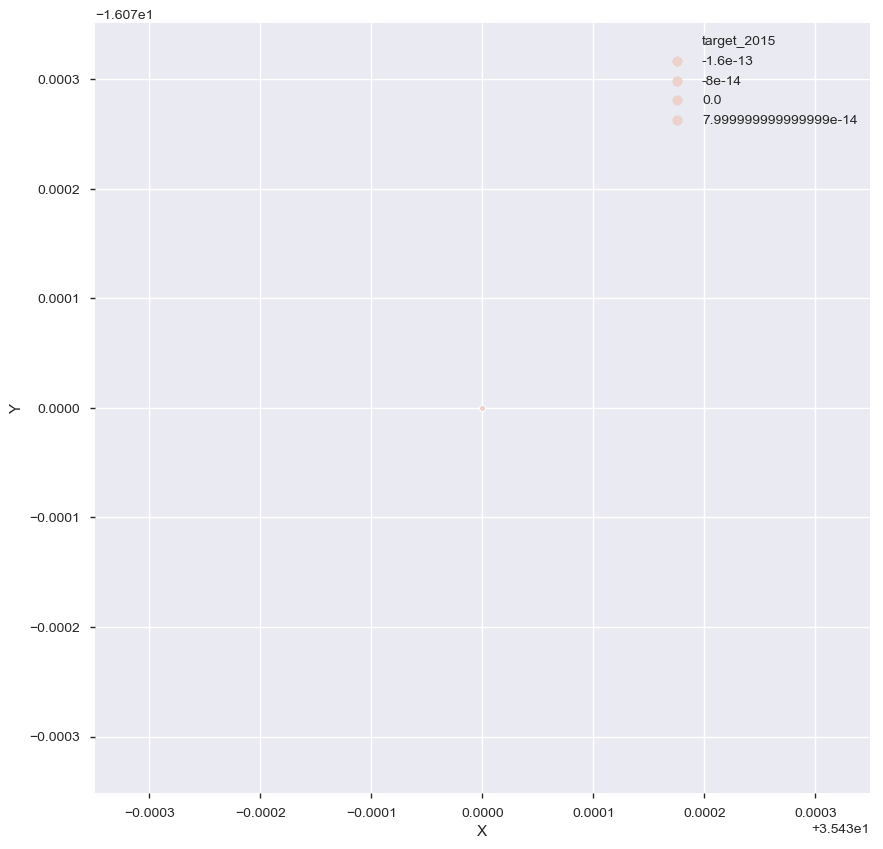

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='X', y='Y',hue = 'target_2015',s=20, data=count_Square_ID)

#### variable Y 

#### variable LC_Type1_mode